## Consonants in Verbmobil: numbers
Here we characterize consonants of the Verbmobil corpus in terms of duration-related data.

In [48]:
# Here I import all python modules needed
import model_utilities
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Static data to be used:

In [49]:
# Here you may point to the dataset you wish to analyse. Just replace the string with your absolute path
#dataset_path = model_utilities.get_path_list("C:/Users/alexutza_a/Abschlussarbeit/DB_Verbmobil/verbmobil_par")
dp1 = model_utilities.get_path_list("C:/Users/alexutza_a/Abschlussarbeit/DB_Verbmobil/Evaluation/Rest")
dp2 = model_utilities.get_path_list("C:/Users/alexutza_a/Abschlussarbeit/DB_Verbmobil/mod_dataset")
dataset_path = dp2 + dp1

# A dictionary of classes of phonemes to use later
ptype_dict = {"diphthong" : ["aU", "aI", "OY"], "long_vowels" : ["a:", "a~:", "e:", "E:", "i:", "o:", "u:", "y:", "2:"],
              "short_vowels" : ["a", "a~", "e", "E", "I", "i", "O", "o", "U", "u", "Y", "y", "9", "2"], "schwa" : ["@", "6"],
              "plosive" : ["b", "d", "p", "t", "k", "g"], "fricative" : ["f", "v", "s", "S", "z", "Z", "x", "h", "C"],
              "nasal" : ["m", "n", "N"], "lateral" : ["l"], "approximant" : ["j"], "other" : [ "Q", "r"]}

# List of consonants
cons_list = ["z", "S", "Z", "C", "x", "N", "Q", "b", "d", "f", "g", "h", "j", "k", "l", "m", "n", "p", "r", "s", "t", "v"]

# Path for saving pictures
fig_path = "C:/Users/alexutza_a/Abschlussarbeit/Grafiken/Consonants"

The following dictionary contains rather few features, as it is only meant for the above specified purpose.<br />
On the other hand, it takes a rather short time to build, even with very large databases.

In [50]:
# This is a dictionary of all phonemes in the dataset used, containing their durations and filename
# Looks like: {"a" : [1599, g001a_acn1_AAJ.par, 2348, g001a_acn1_AAJ.par, 959, ...], 
#              "b" : [...], ...}
# Calculate dictionary once, use it then many times ;)
%time phon_dur_dict = model_utilities.dur_dict_filename(dataset_path)

Wall time: 6.41 s


### Overall statistics on consonants: dirty data


Total consonants: 367674
Minimum duration: 0.03 sec
Maximum duration: 4.06 sec
Q1: 0.04 sec
Mean duration: 0.07 sec
Median duration: 0.05 sec
Q3: 0.08 sec
Standard deviation: 0.07 sec


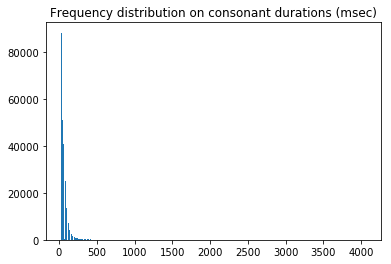

Length of cleaned list: 335110


In [61]:
# Create list of all consonant durations from the DB
cdur_list = []
for key in phon_dur_dict.keys():
    if key in cons_list:
        cl = phon_dur_dict[key][::2]
        cdur_list += cl

# Statistic data on consonant durations
print("Total consonants: " + str(len(cdur_list)))
print("Minimum duration: " + str(round(min(cdur_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(cdur_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(cdur_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(cdur_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(cdur_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(cdur_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(cdur_list)*0.0000625, 2)) + " sec")

# Histogram of consonant duration
cdur_msec = [ x*0.0625 for x in cdur_list]
plt.hist(cdur_msec, bins = 500)
plt.title("Frequency distribution on consonant durations (msec)")
plt.show()

cons_clean = [x for x in cdur_list if x <= 2000]
print("Length of cleaned list: " + str(len(cons_clean)))

### 1. Plosives
<strong>1.0 A plosive-similar unit: glottal stop /Q/</strong>

You notice that removing the upper 1% of the data produces a significant change of the statistics (e.g. reducing <i>&sigma; - value</i> to its half), while removing the lower 1% of the data doesn't produce any change.

In [55]:
# List of durations of /Q/ from phon_dict (contains all instances)
q_list = phon_dur_dict["Q"][::2]

# Counting 1% of data (for outliers)
q_sli = sorted(q_list)
outliers = int(len(q_list)*1.0//100)
print("Count of outliers (1.0%) = " + str(outliers))

# List of durations without the upper 1% of the data
q_sl = q_sli[:len(q_list)-outliers]

# List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
q_clean = q_sli[outliers:len(q_list)-outliers]

# Counting 25% of datapoints
count_q25 = int(len(q_list)*25//100)
print("Count Q25: " + str(count_q25))

# List of durations without upper 25% of data
q_interq = q_sli[:len(q_list)-count_q25]

Count of outliers (1.0%) = 133
Count Q25: 3337


In [53]:
# Consolidating statistic data on glottal stop for different amounts of data

print("Consolidating statistic data on glottal stop for different amounts of data")

df = pd.DataFrame({
    'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
    'Dirty (all)':[str(len(q_list)), round(min(q_list)*0.0000625, 2), 
                   round(np.percentile(q_list, 25)*0.0000625, 2), 
                   round(np.mean(q_list)*0.0000625, 2), 
                   round(np.median(q_list)*0.0000625, 2), 
                   round(np.percentile(q_list, 75)*0.0000625, 2),
                   round(max(q_list)*0.0000625, 2), 
                   round(np.std(q_list)*0.0000625, 2)],
    "No upper 1%":[str(len(q_sl)), round(min(q_list)*0.0000625, 2), 
                   round(np.percentile(q_sl, 25)*0.0000625, 2), 
                   round(np.mean(q_sl)*0.0000625, 2), 
                   round(np.median(q_sl)*0.0000625, 2), 
                   round(np.percentile(q_sl, 75)*0.0000625, 2),
                   round(max(q_sl)*0.0000625, 2), 
                   round(np.std(q_sl)*0.0000625, 2)], 
    "No upper & lower 1%":[str(len(q_clean)), round(min(q_list)*0.0000625, 2), 
                   round(np.percentile(q_clean, 25)*0.0000625, 2), 
                   round(np.mean(q_clean)*0.0000625, 2), 
                   round(np.median(q_clean)*0.0000625, 2), 
                   round(np.percentile(q_clean, 75)*0.0000625, 2),
                   round(max(q_clean)*0.0000625, 2), 
                   round(np.std(q_clean)*0.0000625, 2)], 
    "No upper 25%":[str(len(q_interq)), round(min(q_interq)*0.0000625, 2), 
                   round(np.percentile(q_interq, 25)*0.0000625, 2), 
                   round(np.mean(q_interq)*0.0000625, 2), 
                   round(np.median(q_interq)*0.0000625, 2), 
                   round(np.percentile(q_interq, 75)*0.0000625, 2),
                   round(max(q_interq)*0.0000625, 2), 
                   round(np.std(q_interq)*0.0000625, 2)], 
})
df.style

Consolidating statistic data on glottal stop for different amounts of data


#### Histograms for glottal stop with different types of data preprocessing
<ol>
<li>Using all data (dirty).</li>
<li>Without upper 1% of data.</li>
<li>Cutting upper and lower 1% of data.</li>
<li>Using only data between 25th and 75th quartiles.</li>
</ol>

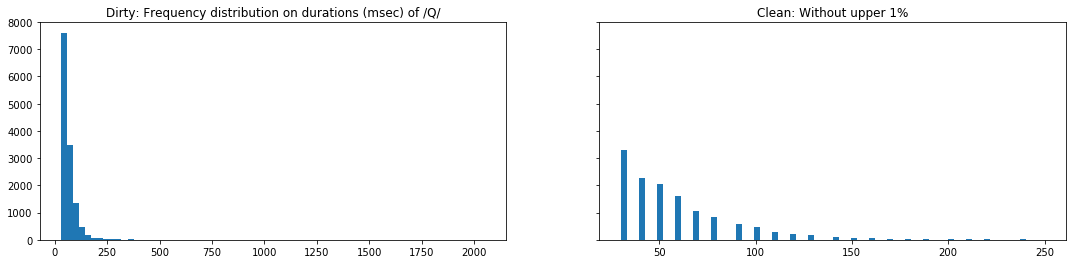

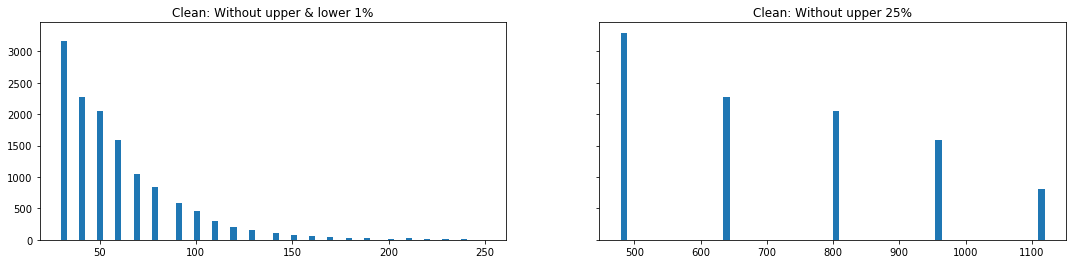

In [54]:
# Histograms of glottal stop
q_msec = [ a*0.0625 for a in q_list]
clean_qmsec = [b*0.0625 for b in q_sl]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.hist(q_msec, bins = 70)
ax1.set_title("Dirty: Frequency distribution on durations (msec) of /Q/")

ax2.hist(clean_qmsec, bins = 70)
ax2.set_title("Clean: Without upper 1%")

f.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
#plt.show()

clean1_ms = [c*0.0625 for c in q_clean]


f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)

ax3.hist(clean1_ms, bins = 70)
ax3.set_title("Clean: Without upper & lower 1%")

ax4.hist(q_interq, bins = 70)
ax4.set_title("Clean: Without upper 25%")

f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)

plt.show()

<strong>1.1 "Normal" plosives: /b/, /p/, /d/, /t/, /g/, /k/. </strong>

<i>Overall statistic data</i>

In [172]:
# List of durations for /b/, /p/, /d/, /t/, /g/, and /k/.
plos_list = []
for plosive in ptype_dict["plosive"]:
    plos_list += phon_dur_dict[plosive][::2]
print("Total occurencies of normal plosives: " + str(len(plos_list)))

Total occurencies of normal plosives: 103806


In [173]:
# Eliminate upper and lower 1% datapoints
plos1_list = []
for plosive in ptype_dict["plosive"]:
    pls = sorted(phon_dur_dict[plosive][::2])
    out = int(len(pls)*1.0//100)
    plos1_list += pls[out:len(pls)-out]
print("Total occurencies of normal plosives: " + str(len(plos1_list)))

Total occurencies of normal plosives: 101734


Total plosives: 103806
Minimum duration: 0.03 sec
Maximum duration: 4.06 sec
Q1: 0.03 sec
Mean duration: 0.06 sec
Median duration: 0.05 sec
Q3: 0.07 sec
Standard deviation: 0.07 sec


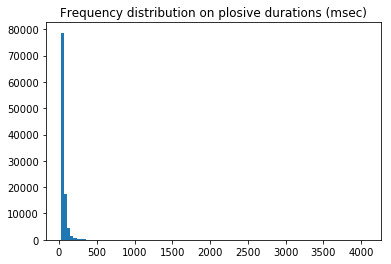

In [181]:
# Statistic data on plosive durations
print("Total plosives: " + str(len(plos_list)))
print("Minimum duration: " + str(round(min(plos_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(plos_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(plos_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(plos_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(plos_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(plos_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(plos_list)*0.0000625, 2)) + " sec")

# Histogram of consonant duration
plos_msec = [ x*0.0625 for x in plos_list]
plt.hist(plos_msec, bins = 100)
plt.title("Frequency distribution on plosive durations (msec)")
plt.show()

Total plosives: 101734
Minimum duration: 0.03 sec
Maximum duration: 0.5 sec
Q1: 0.03 sec
Mean duration: 0.06 sec
Median duration: 0.05 sec
Q3: 0.07 sec
Standard deviation: 0.04 sec


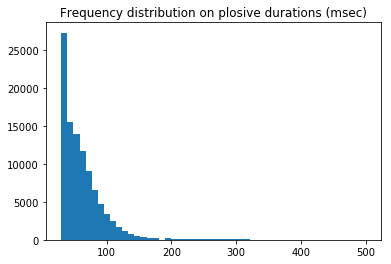

In [179]:
# Statistic data on plosive durations
# Eliminated upper and lower 1% datapoints
print("Total plosives: " + str(len(plos1_list)))
print("Minimum duration: " + str(round(min(plos1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(plos1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(plos1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(plos1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(plos1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(plos1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(plos1_list)*0.0000625, 2)) + " sec")

# Histogram of plosive duration
plos1_msec = [ x*0.0625 for x in plos1_list]
plt.hist(plos1_msec, bins = 50)
plt.title("Frequency distribution on plosive durations (msec)")
plt.show()

<u><big> Plosives, one at a time:</big></u>

Statistics for /b/

Total occurencies of b: 9912
Count of outliers (1.0%) = 99
Longest 10 durations:
[169.94, 169.94, 179.94, 189.94, 189.94, 189.94, 199.94, 209.94, 279.94, 279.94]

Consolidating statistic data on b for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        9912                9714        9813         7434
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.05                0.05        0.05         0.04
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.06                0.06        0.06         0.05
6  Max value:        0.28                0.12        0.12         0.06
7   Std. dev:        0.02                0.02        0.02         0.01


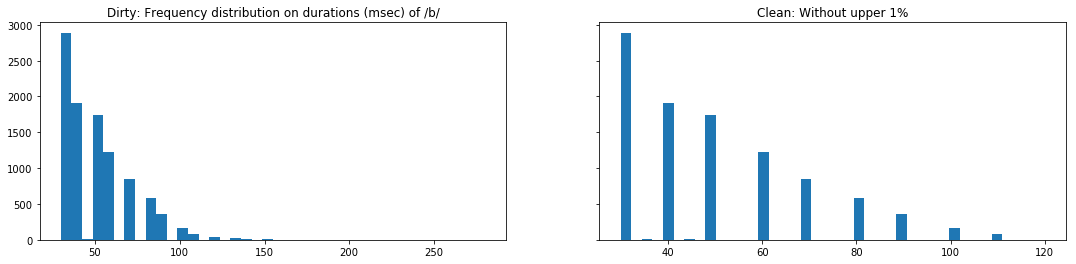

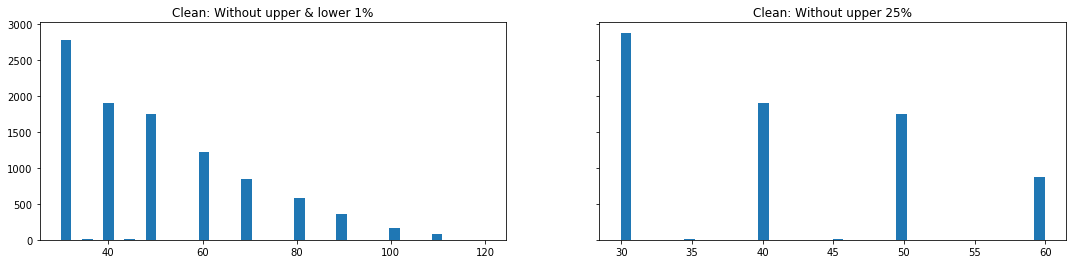

Statistics for /p/

Total occurencies of p: 5006
Count of outliers (1.0%) = 50
Longest 10 durations:
[319.94, 319.94, 319.94, 329.94, 339.94, 379.94, 429.94, 439.94, 469.94, 729.94]

Consolidating statistic data on p for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        5006                4906        4956         3755
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.04                0.04        0.04         0.04
3       Mean:        0.07                0.07        0.07         0.05
4     Median:        0.06                0.06        0.06         0.05
5        Q75:        0.09                0.09        0.09         0.07
6  Max value:        0.73                 0.2         0.2         0.09
7   Std. dev:        0.04                0.03        0.03         0.02


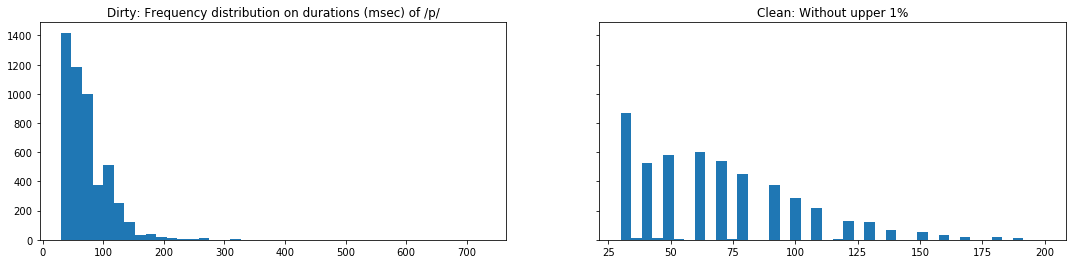

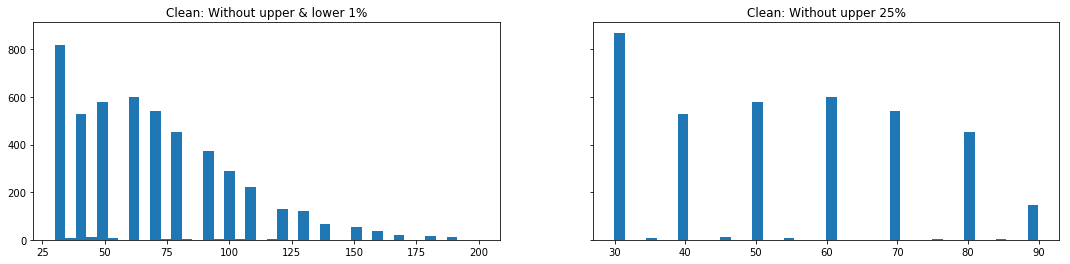

Statistics for /d/

Total occurencies of d: 24835
Count of outliers (1.0%) = 248
Longest 10 durations:
[299.94, 299.94, 299.94, 309.94, 319.94, 359.94, 379.94, 449.94, 519.94, 559.94]

Consolidating statistic data on d for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       24835               24339       24587        18627
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.05                0.05        0.05         0.04
4     Median:        0.04                0.04        0.04         0.04
5        Q75:        0.06                0.06        0.06         0.05
6  Max value:        0.56                0.13        0.13         0.06
7   Std. dev:        0.02                0.02        0.02         0.01


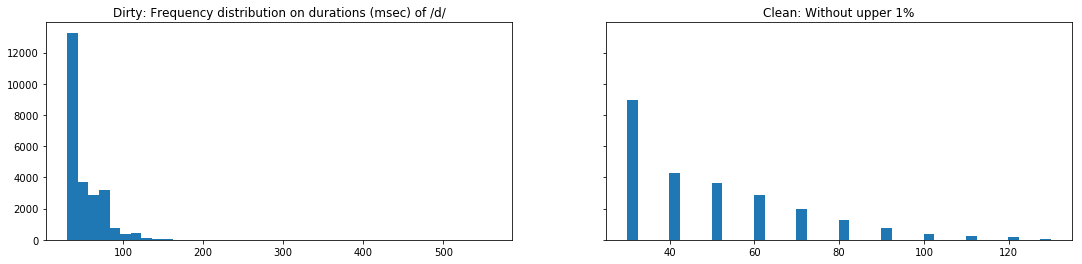

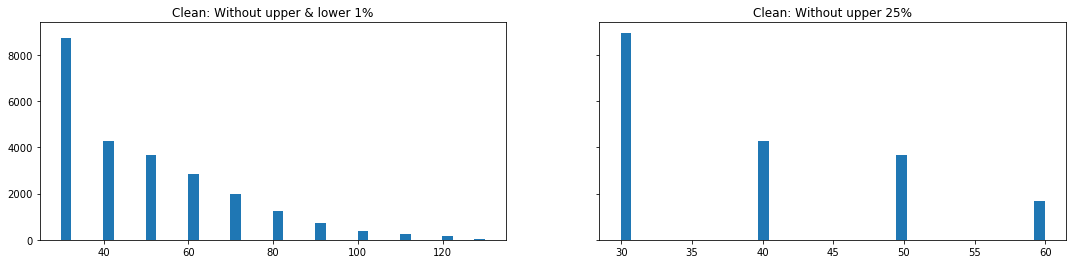

Statistics for /t/

Total occurencies of t: 40230
Count of outliers (1.0%) = 402
Longest 10 durations:
[1989.94, 1999.94, 2069.94, 2089.94, 2129.94, 2419.94, 2739.94, 2979.94, 3939.94, 4059.94]

Consolidating statistic data on t for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       40230               39426       39828        30173
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.08                0.07        0.07         0.05
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.08                0.08        0.08         0.06
6  Max value:        4.06                 0.5         0.5         0.08
7   Std. dev:         0.1                0.06        0.06         0.02


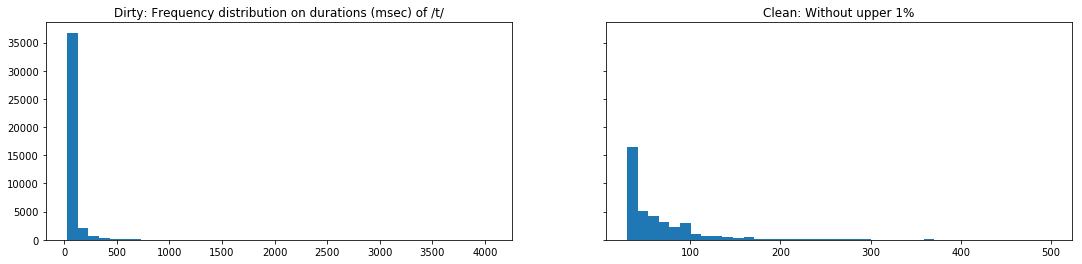

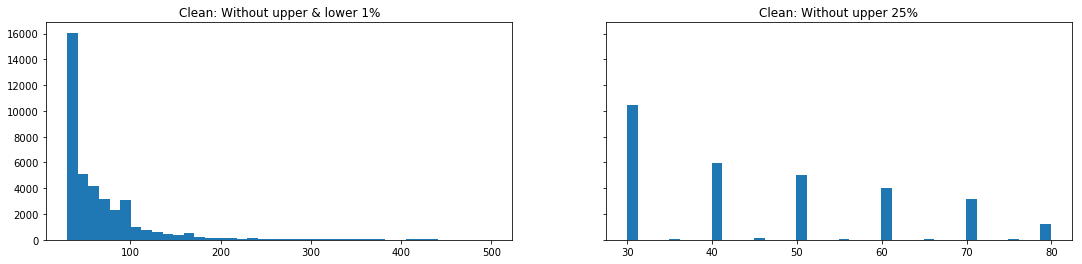

Statistics for /g/

Total occurencies of g: 12062
Count of outliers (1.0%) = 120
Longest 10 durations:
[269.94, 269.94, 299.94, 309.94, 319.94, 349.94, 379.94, 419.94, 469.94, 479.94]

Consolidating statistic data on g for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       12062               11822       11942         9047
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.05                0.05        0.05         0.04
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.07                0.07        0.07         0.05
6  Max value:        0.48                0.14        0.14         0.07
7   Std. dev:        0.03                0.02        0.02         0.01


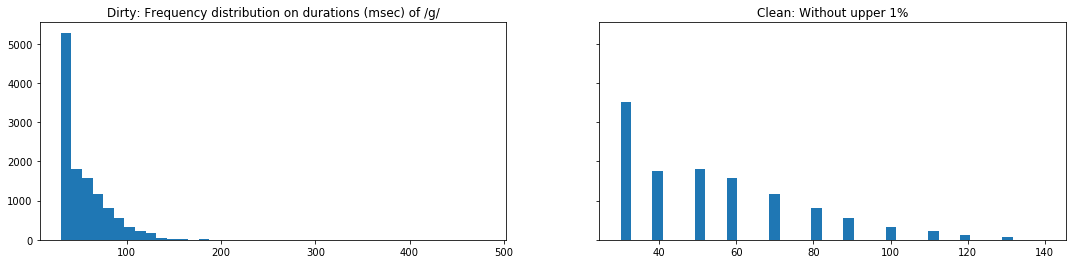

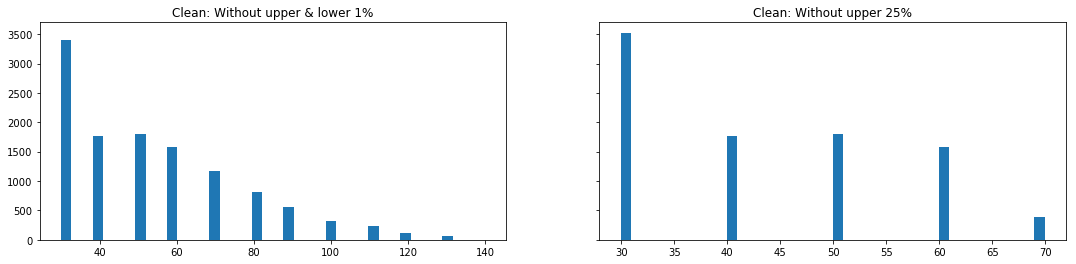

Statistics for /k/

Total occurencies of k: 11761
Count of outliers (1.0%) = 117
Longest 10 durations:
[309.94, 319.94, 319.94, 319.94, 329.94, 339.94, 359.94, 379.94, 509.94, 529.94]

Consolidating statistic data on k for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       11761               11527       11644         8821
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.05                0.05        0.05         0.04
3       Mean:        0.08                0.08        0.07         0.06
4     Median:        0.07                0.07        0.07         0.06
5        Q75:         0.1                 0.1         0.1         0.08
6  Max value:        0.53                0.19        0.19          0.1
7   Std. dev:        0.04                0.03        0.03         0.02


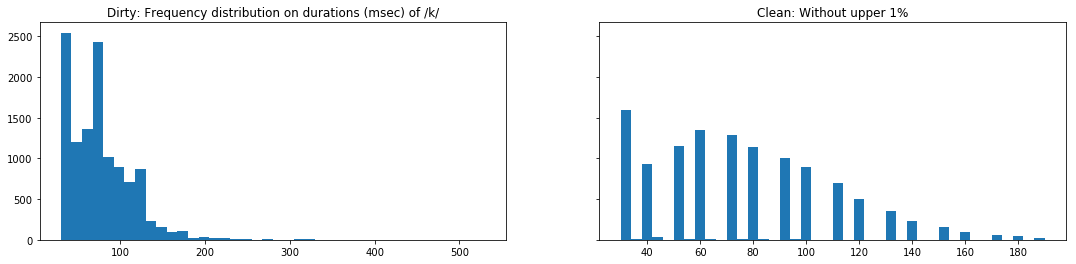

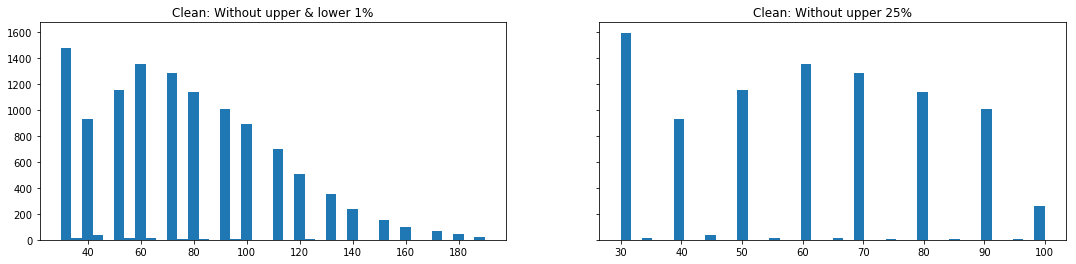

In [109]:
# List of plosives
plosives = ["b", "p", "d", "t", "g", "k"]

for plosive in plosives:
    print("Statistics for /" + plosive + "/\n")
    # List of all occurencies of given plosive
    dur_list = phon_dur_dict[plosive][::2]
    dur_list = [round(x*0.0625,2) for x in dur_list]
    print("Total occurencies of " + plosive + ": " + str(len(dur_list)))
    
    # Counting 1% of data (for outliers)
    dur_sorted = sorted(dur_list)
    outliers1 = int(len(dur_list)*1.0//100)
    print("Count of outliers (1.0%) = " + str(outliers1) + "\nLongest 10 durations:")
    print(dur_sorted[-10:])
    # List of durations without the upper 1% of the data
    dur_minus1 = dur_sorted[:len(dur_list)-outliers1]
    
    # List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
    dur_uplow1 = dur_sorted[outliers1:len(dur_list)-outliers1]
    
    # Counting 25% of datapoints
    count25 = int(len(dur_list)*25//100)
    
    # List of durations without upper 25% of data
    dur75 = dur_sorted[:len(dur_list)-count25]
    
    # Consolidating statistic data on each plosive for different amounts of data
    print("\nConsolidating statistic data on " + plosive + " for different amounts of data.\nValues are given in seconds.")
    df = pd.DataFrame({
        'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
        'Dirty (all)':[str(len(dur_list)), round(min(dur_list)/1000, 2), round(np.percentile(dur_list, 25)/1000, 2), 
                       round(np.mean(dur_list)/1000, 2), round(np.median(dur_list)/1000, 2), 
                       round(np.percentile(dur_list, 75)/1000, 2), round(max(dur_list)/1000, 2), 
                       round(np.std(dur_list)/1000, 2)],
        "No upper 1%":[str(len(dur_minus1)), round(min(dur_minus1)/1000, 2), round(np.percentile(dur_minus1, 25)/1000, 2), 
                       round(np.mean(dur_minus1)/1000, 2), round(np.median(dur_minus1)/1000, 2), 
                       round(np.percentile(dur_minus1, 75)/1000, 2), round(max(dur_minus1)/1000, 2), 
                       round(np.std(dur_minus1)/1000, 2)], 
        "No upper & lower 1%":[str(len(dur_uplow1)), round(min(dur_uplow1)/1000, 2), 
                               round(np.percentile(dur_uplow1, 25)/1000, 2), round(np.mean(dur_uplow1)/1000, 2), 
                               round(np.median(dur_uplow1)/1000, 2), round(np.percentile(dur_uplow1, 75)/1000, 2), 
                               round(max(dur_uplow1)/1000, 2), round(np.std(dur_uplow1)/1000, 2)], 
        "No upper 25%":[str(len(dur75)), round(min(dur75)/1000, 2), round(np.percentile(dur75, 25)/1000, 2), 
                        round(np.mean(dur75)/1000, 2), round(np.median(dur75)/1000, 2), 
                        round(np.percentile(dur75, 75)/1000, 2), round(max(dur75)/1000, 2), round(np.std(dur75)/1000, 2)]})
    df.style
    print(df)
    
    # Creating histograms for the 4 types of data selection for each plosive
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(dur_list, bins = 40)
    ax1.set_title("Dirty: Frequency distribution on durations (msec) of /" + plosive + "/")
    ax2.hist(dur_minus1, bins = 40)
    ax2.set_title("Clean: Without upper 1%")
    f1.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
    ax3.hist(dur_uplow1, bins = 40)
    ax3.set_title("Clean: Without upper & lower 1%")
    ax4.hist(dur75, bins = 40)
    ax4.set_title("Clean: Without upper 25%")
    f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    plt.show()
    

<u><big>Checking outliers:</big></u>

In [149]:
print("Files containing outliers of /t/")
outlier_dur = sorted(phon_dur_dict["t"][::2])[-5:]
outlier_sec = [round(x*0.0000625,2) for x in outlier_dur]
outlier_list = []
#print(outlier_dur)
for el in phon_dur_dict["t"]:
    if type(el) == int and el >=38700:
        outlier_list.append(el)
        outlier_list.append(phon_dur_dict["t"][phon_dur_dict["t"].index(el)+1])
df = pd.DataFrame({'Filename' : outlier_list[1::2], 'Duration (spls)': outlier_list[::2], 'Duration (s)':outlier_sec})
df.style
print(df)

print("Files containing outliers of /d/")
outlierd_dur = sorted(phon_dur_dict["d"][::2])[-5:]
outlierd_sec = [round(x*0.0000625,2) for x in outlierd_dur]
outlierd_list = []
#print(outlierd_dur)
for el in phon_dur_dict["d"]:
    if type(el) == int and el >=5700:
        outlierd_list.append(el)
        outlierd_list.append(phon_dur_dict["d"][phon_dur_dict["d"].index(el)+1])
df_d = pd.DataFrame({'Filename' : outlierd_list[1::2], 'Duration (spls)': outlierd_list[::2], 'Duration (s)':outlierd_sec})
df_d.style

print("Files containing outliers of /k/")
outlierk_dur = sorted(phon_dur_dict["k"][::2])[-5:]
outlierk_sec = [round(x*0.0000625,2) for x in outlierk_dur]
outlierk_list = []
#print(outlierk_dur)
for el in phon_dur_dict["k"]:
    if type(el) == int and el >=5400:
        outlierk_list.append(el)
        outlierk_list.append(phon_dur_dict["k"][phon_dur_dict["k"].index(el)+1])
df_k = pd.DataFrame({'Filename' : outlierk_list[1::2], 'Duration (spls)': outlierk_list[::2], 'Duration (s)':outlierk_sec})
df_k.style

print("Files containing outliers of /p/")
outlierp_dur = sorted(phon_dur_dict["p"][::2])[-5:]
outlierp_sec = [round(x*0.0000625,2) for x in outlierp_dur]
outlierp_list = []
#print(outlierp_dur)
for el in phon_dur_dict["p"]:
    if type(el) == int and el >=6000:
        outlierp_list.append(el)
        outlierp_list.append(phon_dur_dict["p"][phon_dur_dict["p"].index(el)+1])
df_p = pd.DataFrame({'Filename' : outlierp_list[1::2], 'Duration (spls)': outlierp_list[::2], 'Duration (s)':outlierp_sec})
df_p.style

print("Files containing outliers of /g/")
outlierg_dur = sorted(phon_dur_dict["g"][::2])[-5:]
outlierg_sec = [round(x*0.0000625,2) for x in outlierg_dur]
outlierg_list = []
#print(outlierg_dur)
for el in phon_dur_dict["g"]:
    if type(el) == int and el >=5590:
        outlierg_list.append(el)
        outlierg_list.append(phon_dur_dict["g"][phon_dur_dict["g"].index(el)+1])
df_g = pd.DataFrame({'Filename' : outlierg_list[1::2], 'Duration (spls)': outlierg_list[::2], 'Duration (s)':outlierg_sec})
df_g.style

print("Files containing outliers of /b/")
outlierb_dur = sorted(phon_dur_dict["b"][::2])[-4:]
outlierb_sec = [round(x*0.0000625,2) for x in outlierb_dur]
outlierb_list = []
#print(outlierb_dur)
for el in phon_dur_dict["b"]:
    if type(el) == int and el >=3190:
        outlierb_list.append(el)
        outlierb_list.append(phon_dur_dict["b"][phon_dur_dict["b"].index(el)+1])
df_b = pd.DataFrame({'Filename' : outlierb_list[1::2], 'Duration (spls)': outlierb_list[::2], 'Duration (s)':outlierb_sec})
df_b.style

Files containing outliers of /t/
   Duration (s)  Duration (spls)                Filename
0          2.42            43839  g221acn1_025_AHR_a.par
1          2.74            63039  g249acn1_029_AIF_a.par
2          2.98            47679  g251acn1_010_AIF_a.par
3          3.94            64959  g251acn1_037_AIF_a.par
4          4.06            38719  g295acn2_014_AJE_a.par
Files containing outliers of /d/
Files containing outliers of /k/
Files containing outliers of /p/
Files containing outliers of /g/
Files containing outliers of /b/


### 2. Fricatives
<strong>2.1 German fricatives: /f/, /v/, /s/, /S/, /z/, /Z/, /x/, /h/, /C/</strong>

<i>Overall statistics</i>

In [150]:
# List of durations for /f/, /v/, /s/, /S/, /z/, /Z/, /x/, /h/, and /C/.
fric_list = []
for fricative in ptype_dict["fricative"]:
    fric_list += phon_dur_dict[fricative][::2]# Eliminate upper and lower 1% datapoints
plos1_list = []
print("Total occurencies of fricatives: " + str(len(fric_list)))

Total occurencies of fricatives: 118321


In [182]:
# Eliminate upper and lower 1% datapoints
fric1_list = []
for fricative in ptype_dict["fricative"]:
    fls = sorted(phon_dur_dict[fricative][::2])
    out = int(len(fls)*1.0//100)
    fric1_list += fls[out:len(fls)-out]
print("Total occurencies of fricataives: " + str(len(fric1_list)))

Total occurencies of fricataives: 115965


Total fricatives: 118321
Minimum duration: 0.03 sec
Maximum duration: 2.45 sec
Q1: 0.04 sec
Mean duration: 0.07 sec
Median duration: 0.05 sec
Q3: 0.08 sec
Standard deviation: 0.06 sec


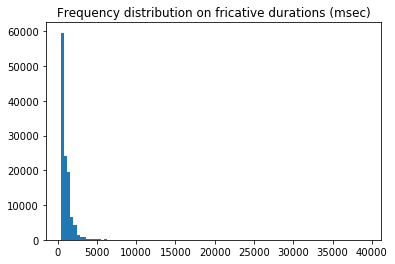

In [163]:
# Statistic data on fricative durations
print("Total fricatives: " + str(len(fric_list)))
print("Minimum duration: " + str(round(min(fric_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(fric_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(fric_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(fric_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(fric_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(fric_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(fric_list)*0.0000625, 2)) + " sec")

# Histogram of consonant duration
fric_msec = [ x*0.0625 for x in fric_list]
plt.hist(fric_list, bins = 100)
plt.title("Frequency distribution on fricative durations (msec)")
plt.show()

Total fricatives: 115965
Minimum duration: 0.03 sec
Maximum duration: 0.62 sec
Q1: 0.04 sec
Mean duration: 0.07 sec
Median duration: 0.05 sec
Q3: 0.08 sec
Standard deviation: 0.04 sec


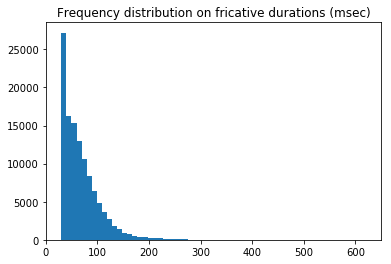

In [185]:
# Statistic data on fricative durations
# Eliminated upper and lower 1% datapoints
print("Total fricatives: " + str(len(fric1_list)))
print("Minimum duration: " + str(round(min(fric1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(fric1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(fric1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(fric1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(fric1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(fric1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(fric1_list)*0.0000625, 2)) + " sec")

# Histogram of consonant duration
fric1_msec = [ x*0.0625 for x in fric1_list]
plt.hist(fric1_msec, bins = 60)
plt.title("Frequency distribution on fricative durations (msec)")
plt.show()

<u><big> Fricatives, one at a time:</big></u>

Statistics for /f/

Total occurencies of f: 16964
Count of outliers (1.0%) = 169
Longest 10 durations:
[929.94, 949.94, 949.94, 979.94, 989.94, 999.94, 1079.94, 1164.94, 1459.94, 1889.94]

Consolidating statistic data on f for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       16964               16626       16795        12723
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.05                0.05        0.05         0.05
3       Mean:        0.09                0.08        0.08         0.07
4     Median:        0.08                0.08        0.08         0.07
5        Q75:        0.11                0.11        0.11         0.09
6  Max value:        1.89                0.28        0.28         0.11
7   Std. dev:        0.06                0.04        0.04         0.02


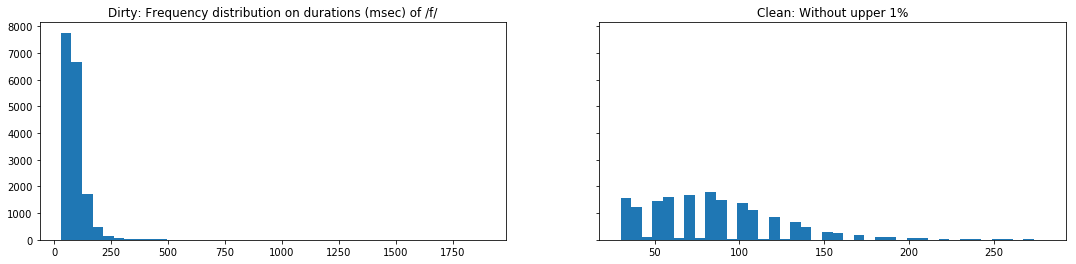

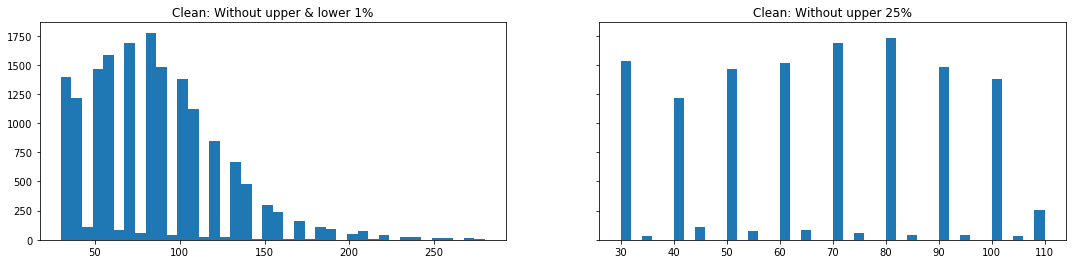

Statistics for /v/

Total occurencies of v: 18269
Count of outliers (1.0%) = 182
Longest 10 durations:
[479.94, 479.94, 489.94, 494.94, 509.94, 519.94, 519.94, 549.94, 789.94, 899.94]

Consolidating statistic data on v for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       18269               17905       18087        13702
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.05                0.05        0.05         0.04
4     Median:        0.04                0.04        0.04         0.04
5        Q75:        0.06                0.06        0.06         0.05
6  Max value:         0.9                0.18        0.18         0.06
7   Std. dev:        0.03                0.02        0.02         0.01


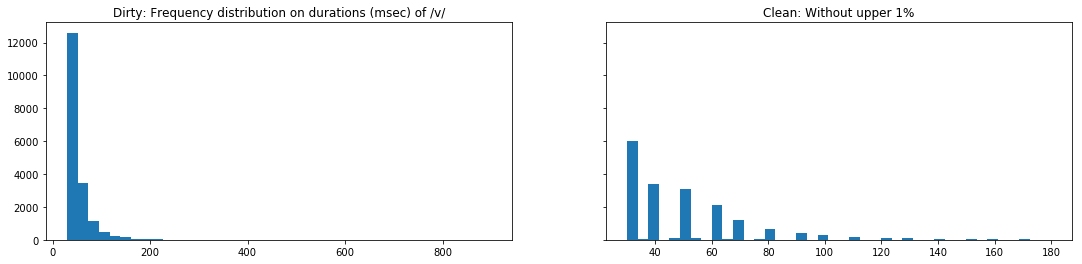

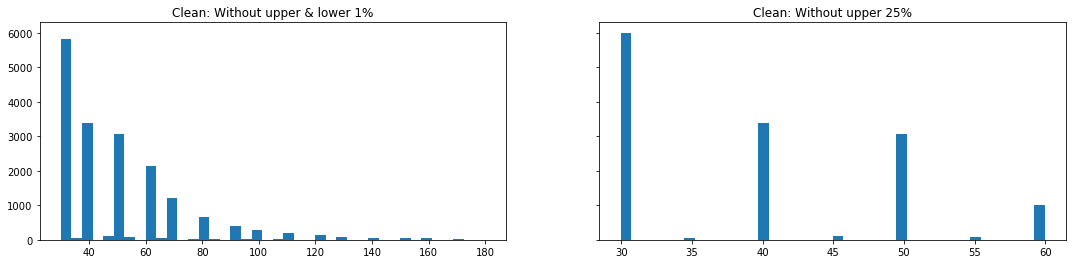

Statistics for /s/

Total occurencies of s: 33690
Count of outliers (1.0%) = 336
Longest 10 durations:
[499.94, 519.94, 559.94, 579.94, 599.94, 599.94, 629.94, 699.94, 779.94, 919.94]

Consolidating statistic data on s for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       33690               33018       33354        25268
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.06                0.06        0.06         0.04
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.07                0.07        0.07         0.05
6  Max value:        0.92                0.22        0.22         0.07
7   Std. dev:        0.04                0.03        0.03         0.01


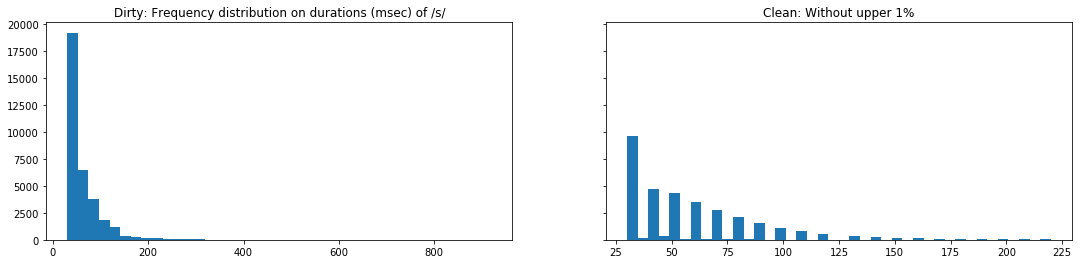

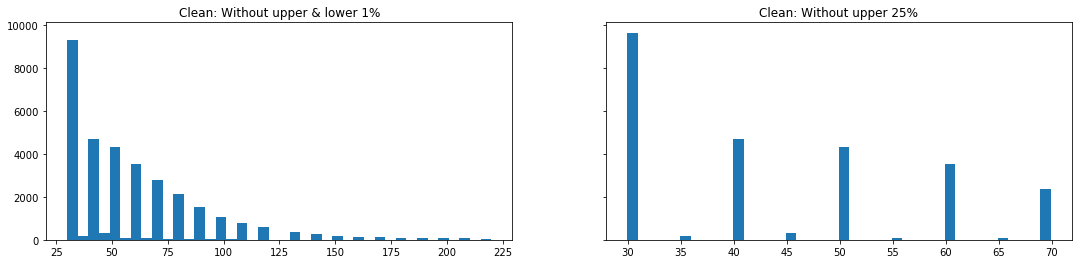

Statistics for /S/

Total occurencies of S: 6009
Count of outliers (1.0%) = 60
Longest 10 durations:
[234.94, 249.94, 249.94, 259.94, 259.94, 279.94, 279.94, 289.94, 289.94, 1169.94]

Consolidating statistic data on S for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        6009                5889        5949         4507
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.05                0.05        0.05         0.04
3       Mean:        0.07                0.07        0.07         0.06
4     Median:        0.07                0.07        0.07         0.06
5        Q75:        0.09                0.09        0.09         0.07
6  Max value:        1.17                0.18        0.18         0.09
7   Std. dev:        0.04                0.03        0.03         0.02


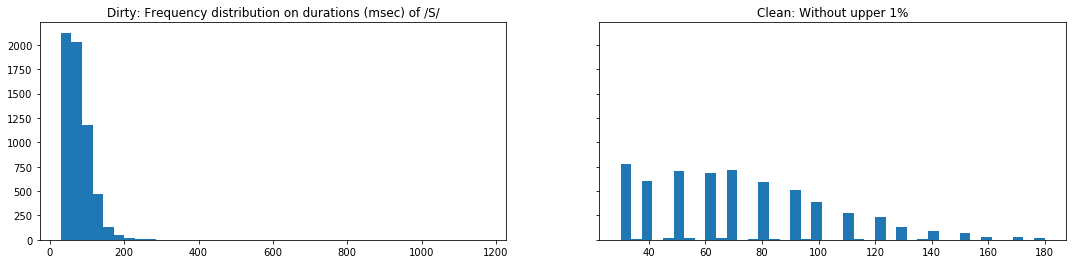

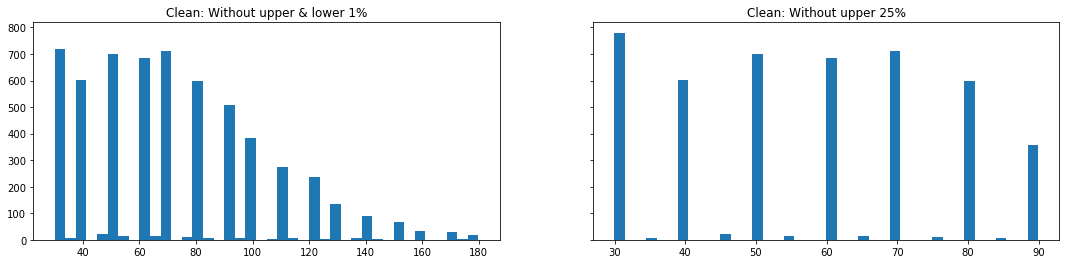

Statistics for /z/

Total occurencies of z: 12527
Count of outliers (1.0%) = 125
Longest 10 durations:
[309.94, 309.94, 319.94, 329.94, 349.94, 369.94, 429.94, 449.94, 574.94, 629.94]

Consolidating statistic data on z for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       12527               12277       12402         9396
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.04                0.04        0.04         0.03
3       Mean:        0.06                0.06        0.06         0.05
4     Median:        0.05                0.05        0.05         0.05
5        Q75:        0.07                0.07        0.07         0.06
6  Max value:        0.63                0.16        0.16         0.07
7   Std. dev:        0.03                0.03        0.03         0.01


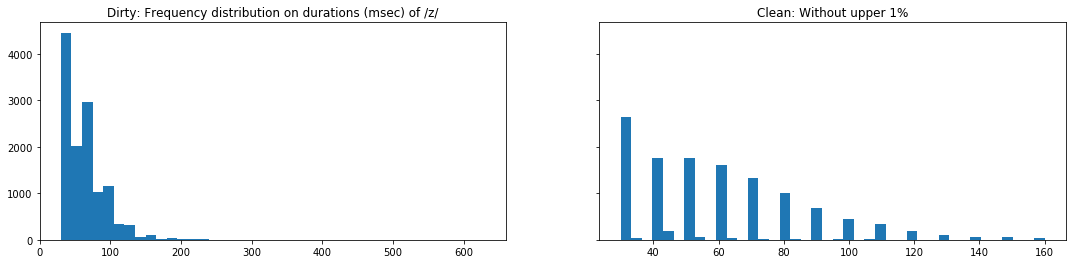

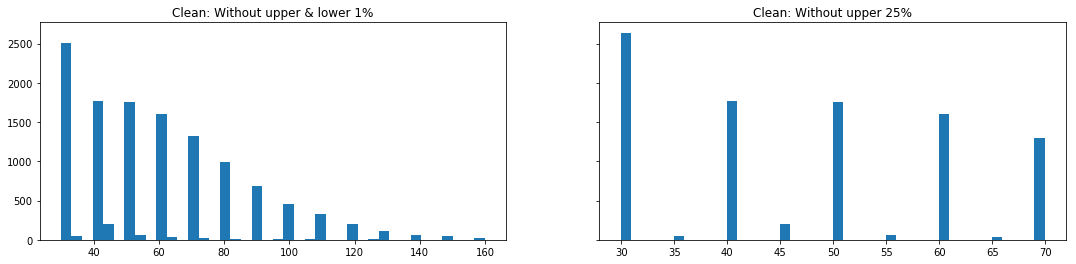

Statistics for /Z/

Total occurencies of Z: 121
Count of outliers (1.0%) = 1
Longest 10 durations:
[109.94, 109.94, 109.94, 119.94, 119.94, 119.94, 119.94, 119.94, 119.94, 119.94]

Consolidating statistic data on Z for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:         121                 119         120           91
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.06                0.06        0.06         0.05
4     Median:        0.06                0.06        0.05         0.04
5        Q75:        0.08                0.08        0.08         0.06
6  Max value:        0.12                0.12        0.12         0.08
7   Std. dev:        0.03                0.03        0.03         0.02


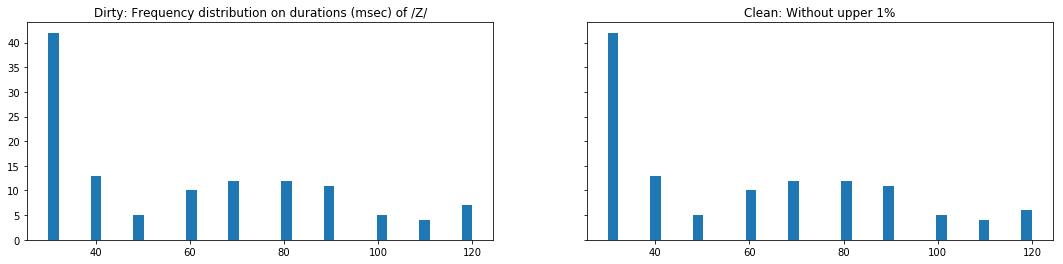

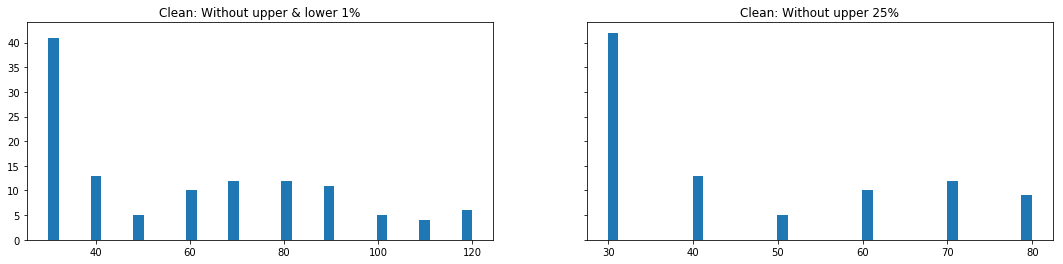

Statistics for /x/

Total occurencies of x: 7281
Count of outliers (1.0%) = 72
Longest 10 durations:
[1119.94, 1189.94, 1239.94, 1299.94, 1369.94, 1569.94, 1729.94, 1894.94, 2009.94, 2449.94]

Consolidating statistic data on x for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        7281                7137        7209         5461
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.05                0.05        0.05         0.04
3       Mean:        0.09                0.08        0.08         0.06
4     Median:        0.07                0.07        0.07         0.06
5        Q75:         0.1                 0.1         0.1         0.08
6  Max value:        2.45                0.44        0.44          0.1
7   Std. dev:        0.09                0.05        0.05         0.02


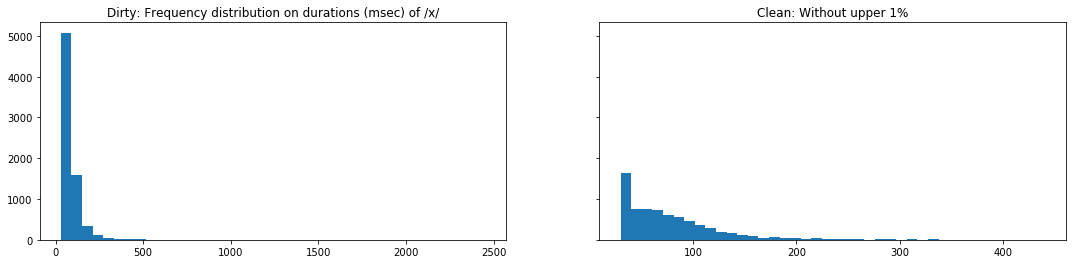

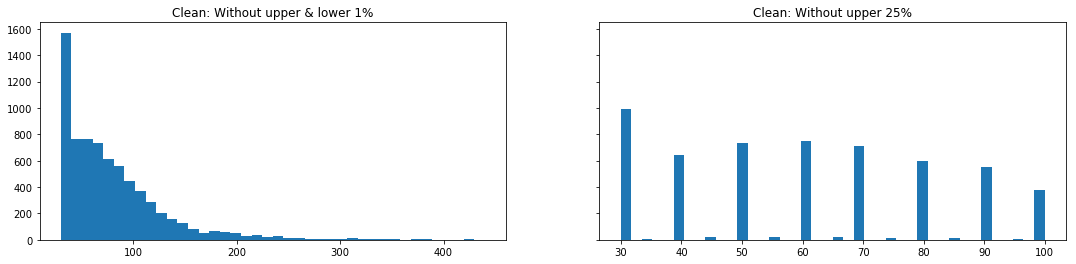

Statistics for /h/

Total occurencies of h: 9864
Count of outliers (1.0%) = 98
Longest 10 durations:
[1069.94, 1079.94, 1099.94, 1099.94, 1159.94, 1269.94, 1289.94, 1289.94, 1789.94, 1929.94]

Consolidating statistic data on h for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        9864                9668        9766         7398
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.08                0.08        0.08         0.05
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.08                0.08        0.08         0.06
6  Max value:        1.93                0.62        0.62         0.08
7   Std. dev:        0.11                0.08        0.08         0.02


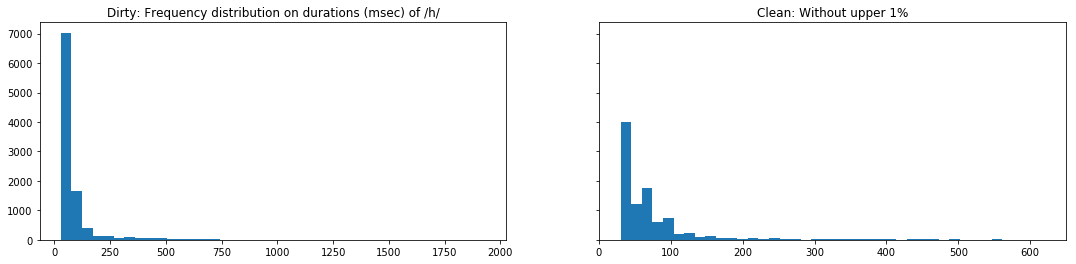

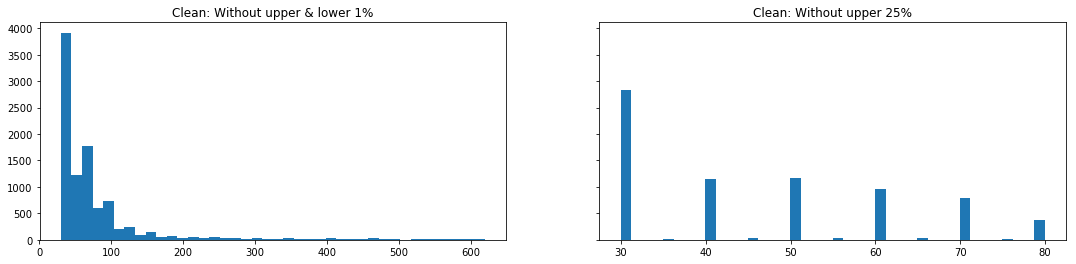

Statistics for /C/

Total occurencies of C: 13596
Count of outliers (1.0%) = 135
Longest 10 durations:
[379.94, 379.94, 399.94, 409.94, 409.94, 409.94, 424.94, 439.94, 469.94, 489.94]

Consolidating statistic data on C for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       13596               13326       13461        10197
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.03                0.03        0.03         0.03
3       Mean:        0.06                0.06        0.06         0.05
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.08                0.08        0.08         0.06
6  Max value:        0.49                0.23        0.23         0.08
7   Std. dev:        0.04                0.04        0.04         0.01


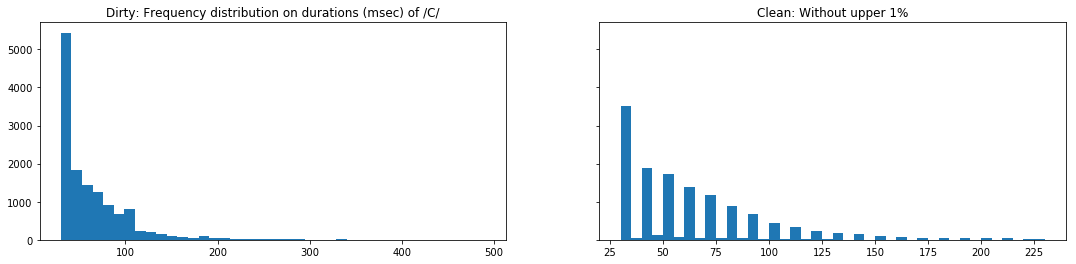

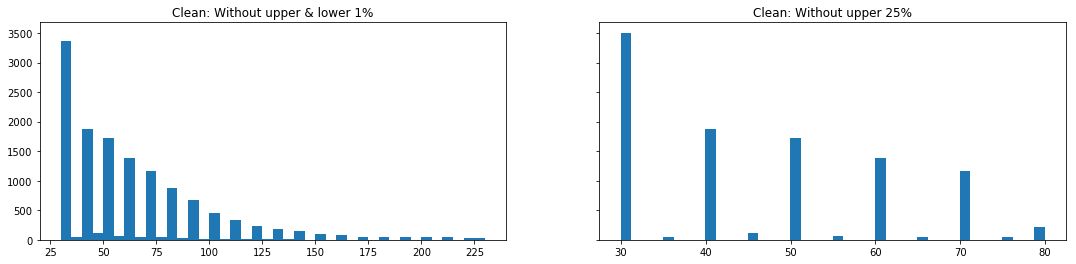

In [155]:
# List of fricatives
fricatives = ["f", "v", "s", "S", "z", "Z", "x", "h", "C"]

for fricative in fricatives:
    print("Statistics for /" + fricative + "/\n")
    # List of all occurencies of given fricative
    dur_list = phon_dur_dict[fricative][::2]
    dur_list = [round(x*0.0625,2) for x in dur_list]
    print("Total occurencies of " + fricative + ": " + str(len(dur_list)))
    
    # Counting 1% of data (for outliers)
    dur_sorted = sorted(dur_list)
    outliers1 = int(len(dur_list)*1.0//100)
    print("Count of outliers (1.0%) = " + str(outliers1) + "\nLongest 10 durations:")
    print(dur_sorted[-10:])
    # List of durations without the upper 1% of the data
    dur_minus1 = dur_sorted[:len(dur_list)-outliers1]
    
    # List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
    dur_uplow1 = dur_sorted[outliers1:len(dur_list)-outliers1]
    
    # Counting 25% of datapoints
    count25 = int(len(dur_list)*25//100)
    
    # List of durations without upper 25% of data
    dur75 = dur_sorted[:len(dur_list)-count25]
    
    # Consolidating statistic data on each plosive for different amounts of data
    print("\nConsolidating statistic data on " + fricative + " for different amounts of data.\nValues are given in seconds.")
    df = pd.DataFrame({
        'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
        'Dirty (all)':[str(len(dur_list)), round(min(dur_list)/1000, 2), round(np.percentile(dur_list, 25)/1000, 2), 
                       round(np.mean(dur_list)/1000, 2), round(np.median(dur_list)/1000, 2), 
                       round(np.percentile(dur_list, 75)/1000, 2), round(max(dur_list)/1000, 2), 
                       round(np.std(dur_list)/1000, 2)],
        "No upper 1%":[str(len(dur_minus1)), round(min(dur_minus1)/1000, 2), round(np.percentile(dur_minus1, 25)/1000, 2), 
                       round(np.mean(dur_minus1)/1000, 2), round(np.median(dur_minus1)/1000, 2), 
                       round(np.percentile(dur_minus1, 75)/1000, 2), round(max(dur_minus1)/1000, 2), 
                       round(np.std(dur_minus1)/1000, 2)], 
        "No upper & lower 1%":[str(len(dur_uplow1)), round(min(dur_uplow1)/1000, 2), 
                               round(np.percentile(dur_uplow1, 25)/1000, 2), round(np.mean(dur_uplow1)/1000, 2), 
                               round(np.median(dur_uplow1)/1000, 2), round(np.percentile(dur_uplow1, 75)/1000, 2), 
                               round(max(dur_uplow1)/1000, 2), round(np.std(dur_uplow1)/1000, 2)], 
        "No upper 25%":[str(len(dur75)), round(min(dur75)/1000, 2), round(np.percentile(dur75, 25)/1000, 2), 
                        round(np.mean(dur75)/1000, 2), round(np.median(dur75)/1000, 2), 
                        round(np.percentile(dur75, 75)/1000, 2), round(max(dur75)/1000, 2), round(np.std(dur75)/1000, 2)]})
    df.style
    print(df)
    
    # Creating histograms for the 4 types of data selection for each fricative
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(dur_list, bins = 40)
    ax1.set_title("Dirty: Frequency distribution on durations (msec) of /" + fricative + "/")
    ax2.hist(dur_minus1, bins = 40)
    ax2.set_title("Clean: Without upper 1%")
    f1.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
    ax3.hist(dur_uplow1, bins = 40)
    ax3.set_title("Clean: Without upper & lower 1%")
    ax4.hist(dur75, bins = 40)
    ax4.set_title("Clean: Without upper 25%")
    f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    plt.show()
    

### 3. Nasals
<strong>3.1 German nasals: /m/, /n/, /N/</strong>

<i>Overall statistics</i>

In [156]:
# List of durations for /m/, /n/, and /N/.
nasal_list = []
for nasal in ptype_dict["nasal"]:
    nasal_list += phon_dur_dict[nasal][::2]
print("Total occurencies of nasals: " + str(len(nasal_list)))

Total occurencies of nasals: 93363


In [186]:
# Eliminate upper and lower 1% datapoints
nasal1_list = []
for nasal in ptype_dict["nasal"]:
    nls = sorted(phon_dur_dict[nasal][::2])
    out = int(len(nls)*1.0//100)
    nasal1_list += nls[out:len(nls)-out]
print("Total occurencies of nasals: " + str(len(nasal1_list)))

Total occurencies of nasals: 91499


Total nasals: 93363
Minimum duration: 0.03 sec
Maximum duration: 3.41 sec
Q1: 0.04 sec
Mean duration: 0.08 sec
Median duration: 0.06 sec
Q3: 0.09 sec
Standard deviation: 0.08 sec


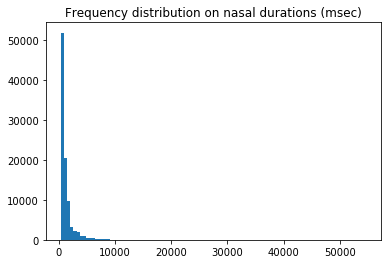

In [165]:
# Statistic data on nasal durations
print("Total nasals: " + str(len(nasal_list)))
print("Minimum duration: " + str(round(min(nasal_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(nasal_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(nasal_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(nasal_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(nasal_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(nasal_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(nasal_list)*0.0000625, 2)) + " sec")

# Histogram of consonant duration
nasal_msec = [ x*0.0625 for x in nasal_list]
plt.hist(nasal_list, bins = 100)
plt.title("Frequency distribution on nasal durations (msec)")
plt.show()

Total nasals: 91499
Minimum duration: 0.03 sec
Maximum duration: 0.56 sec
Q1: 0.04 sec
Mean duration: 0.08 sec
Median duration: 0.06 sec
Q3: 0.09 sec
Standard deviation: 0.06 sec


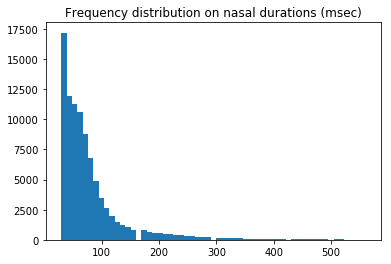

In [191]:
# Statistic data on nasal durations
# Eliminated upper and lower 1% datapoints
print("Total nasals: " + str(len(nasal1_list)))
print("Minimum duration: " + str(round(min(nasal1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(nasal1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(nasal1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(nasal1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(nasal1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(nasal1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(nasal1_list)*0.0000625, 2)) + " sec")

# Histogram of nasal duration
nasal1_msec = [ x*0.0625 for x in nasal1_list]
plt.hist(nasal1_msec, bins = 57)
plt.title("Frequency distribution on nasal durations (msec)")
plt.show()

<u><big> Nasals, one at a time:</big></u>

Statistics for /m/

Total occurencies of m: 27771
Count of outliers (1.0%) = 277
Longest 10 durations:
[1359.94, 1399.94, 1419.94, 1429.94, 1459.94, 1489.94, 1509.94, 1549.94, 2609.94, 3409.94]

Consolidating statistic data on m for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       27771               27217       27494        20829
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.05                0.05        0.05         0.05
3       Mean:        0.11                0.11        0.11         0.06
4     Median:        0.07                0.07        0.07         0.06
5        Q75:        0.12                0.12        0.12         0.08
6  Max value:        3.41                0.56        0.56         0.12
7   Std. dev:        0.11                0.09        0.09         0.02


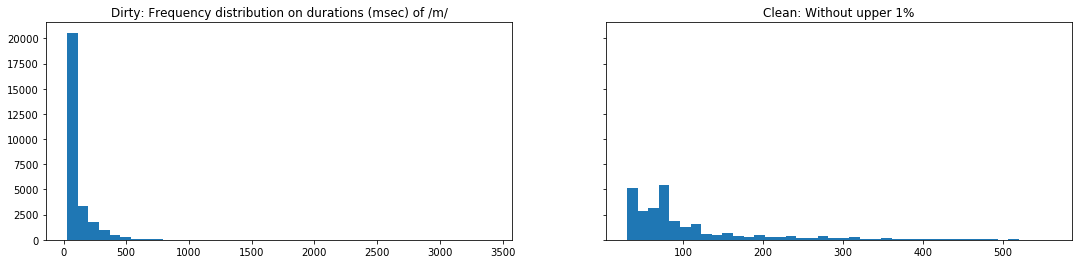

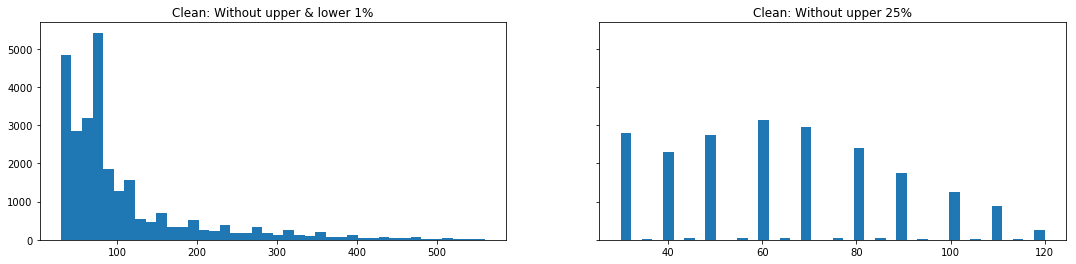

Statistics for /n/

Total occurencies of n: 60351
Count of outliers (1.0%) = 603
Longest 10 durations:
[739.94, 739.94, 759.94, 769.94, 829.94, 829.94, 879.94, 909.94, 969.94, 1089.94]

Consolidating statistic data on n for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:       60351               59145       59748        45264
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.04                0.04        0.04         0.03
3       Mean:        0.07                0.07        0.06         0.05
4     Median:        0.05                0.05        0.05         0.04
5        Q75:        0.08                0.08        0.08         0.06
6  Max value:        1.09                0.29        0.29         0.08
7   Std. dev:        0.05                0.04        0.04         0.02


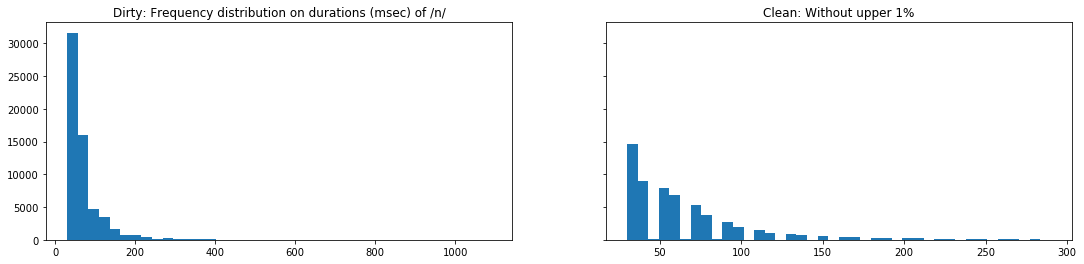

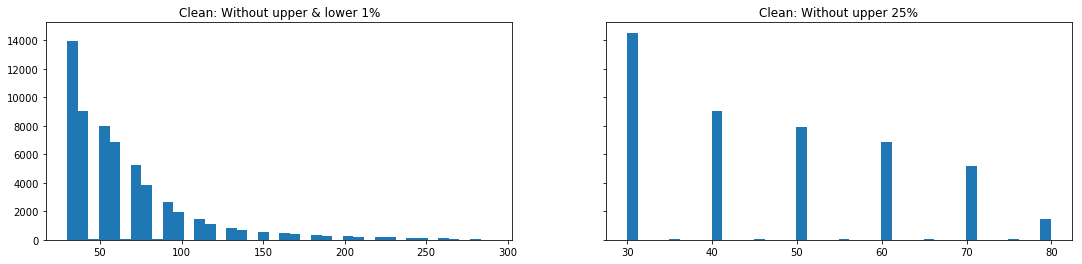

Statistics for /N/

Total occurencies of N: 5241
Count of outliers (1.0%) = 52
Longest 10 durations:
[689.94, 689.94, 699.94, 709.94, 719.94, 769.94, 819.94, 929.94, 949.94, 1169.94]

Consolidating statistic data on N for different amounts of data.
Values are given in seconds.
        Data: Dirty (all) No upper & lower 1% No upper 1% No upper 25%
0      Count:        5241                5137        5189         3931
1  Min value:        0.03                0.03        0.03         0.03
2        Q25:        0.05                0.05        0.05         0.04
3       Mean:        0.09                0.09        0.09         0.06
4     Median:        0.07                0.07        0.07         0.06
5        Q75:        0.11                0.11         0.1         0.08
6  Max value:        1.17                0.41        0.41         0.11
7   Std. dev:        0.08                0.06        0.06         0.02


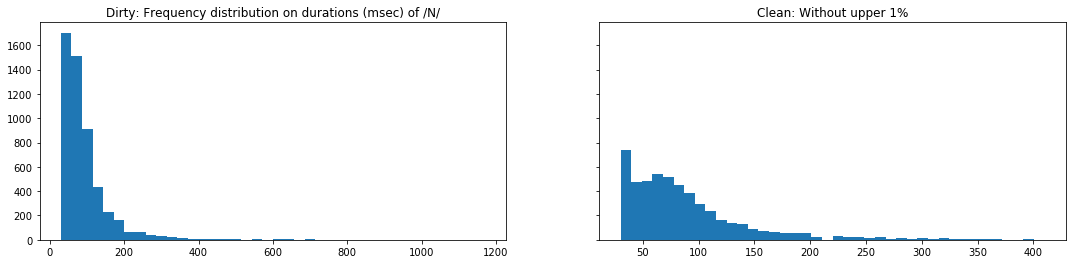

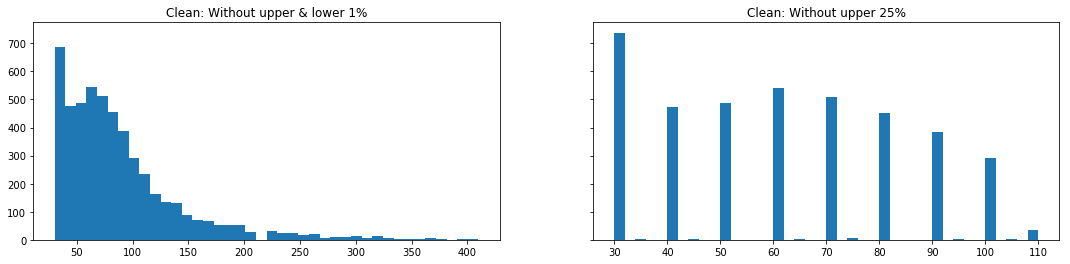

In [159]:
# List of nasals
nasals = ["m", "n", "N"]

for nasal in nasals:
    print("Statistics for /" + nasal + "/\n")
    # List of all occurencies of given nasal
    dur_list = phon_dur_dict[nasal][::2]
    dur_list = [round(x*0.0625,2) for x in dur_list]
    print("Total occurencies of " + nasal + ": " + str(len(dur_list)))
    
    # Counting 1% of data (for outliers)
    dur_sorted = sorted(dur_list)
    outliers1 = int(len(dur_list)*1.0//100)
    print("Count of outliers (1.0%) = " + str(outliers1) + "\nLongest 10 durations:")
    print(dur_sorted[-10:])
    # List of durations without the upper 1% of the data
    dur_minus1 = dur_sorted[:len(dur_list)-outliers1]
    
    # List of durations without upper and lower 1% of data (see no change to deleting only upper 1%)
    dur_uplow1 = dur_sorted[outliers1:len(dur_list)-outliers1]
    
    # Counting 25% of datapoints
    count25 = int(len(dur_list)*25//100)
    
    # List of durations without upper 25% of data
    dur75 = dur_sorted[:len(dur_list)-count25]
    
    # Consolidating statistic data on each plosive for different amounts of data
    print("\nConsolidating statistic data on " + nasal + " for different amounts of data.\nValues are given in seconds.")
    df = pd.DataFrame({
        'Data:': ["Count:", "Min value:", "Q25:", "Mean:", "Median:", "Q75:", "Max value:", "Std. dev:"],
        'Dirty (all)':[str(len(dur_list)), round(min(dur_list)/1000, 2), round(np.percentile(dur_list, 25)/1000, 2), 
                       round(np.mean(dur_list)/1000, 2), round(np.median(dur_list)/1000, 2), 
                       round(np.percentile(dur_list, 75)/1000, 2), round(max(dur_list)/1000, 2), 
                       round(np.std(dur_list)/1000, 2)],
        "No upper 1%":[str(len(dur_minus1)), round(min(dur_minus1)/1000, 2), round(np.percentile(dur_minus1, 25)/1000, 2), 
                       round(np.mean(dur_minus1)/1000, 2), round(np.median(dur_minus1)/1000, 2), 
                       round(np.percentile(dur_minus1, 75)/1000, 2), round(max(dur_minus1)/1000, 2), 
                       round(np.std(dur_minus1)/1000, 2)], 
        "No upper & lower 1%":[str(len(dur_uplow1)), round(min(dur_uplow1)/1000, 2), 
                               round(np.percentile(dur_uplow1, 25)/1000, 2), round(np.mean(dur_uplow1)/1000, 2), 
                               round(np.median(dur_uplow1)/1000, 2), round(np.percentile(dur_uplow1, 75)/1000, 2), 
                               round(max(dur_uplow1)/1000, 2), round(np.std(dur_uplow1)/1000, 2)], 
        "No upper 25%":[str(len(dur75)), round(min(dur75)/1000, 2), round(np.percentile(dur75, 25)/1000, 2), 
                        round(np.mean(dur75)/1000, 2), round(np.median(dur75)/1000, 2), 
                        round(np.percentile(dur75, 75)/1000, 2), round(max(dur75)/1000, 2), round(np.std(dur75)/1000, 2)]})
    df.style
    print(df)
    
    # Creating histograms for the 4 types of data selection for each fricative
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(dur_list, bins = 40)
    ax1.set_title("Dirty: Frequency distribution on durations (msec) of /" + nasal + "/")
    ax2.hist(dur_minus1, bins = 40)
    ax2.set_title("Clean: Without upper 1%")
    f1.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
    ax3.hist(dur_uplow1, bins = 40)
    ax3.set_title("Clean: Without upper & lower 1%")
    ax4.hist(dur75, bins = 40)
    ax4.set_title("Clean: Without upper 25%")
    f2.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=3)
    
    plt.show()
    

### 4. Laterals
<strong>4.1 Dental lateral: /l/</strong>

<i>Statistic data</i>

In [160]:
# List of durations of /l/
ldur_list = phon_dur_dict["l"][::2]
print("Total occurencies of /l/: " + str(len(ldur_list)))

Total occurencies of /l/: 18300


In [192]:
# List of durations of /l/, without upper and lower 1% datapoints
ldur_list = phon_dur_dict["l"][::2]
ldur_list = sorted(ldur_list)
out = int(len(ldur_list)*1.0//100)
ldur1_list = ldur_list[out:len(ldur_list)-out]
print("Total occurencies of /l/: " + str(len(ldur1_list)))

Total occurencies of /l/: 17934


Total count: 18300
Minimum duration: 0.03 sec
Maximum duration: 1.89 sec
Q1: 0.03 sec
Mean duration: 0.07 sec
Median duration: 0.05 sec
Q3: 0.07 sec
Standard deviation: 0.06 sec


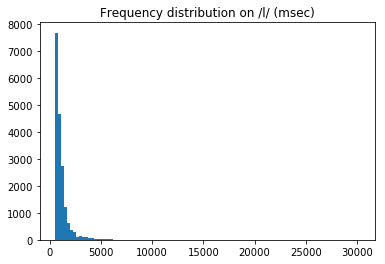

In [161]:
# Statistic data on /l/ duration
print("Total count: " + str(len(ldur_list)))
print("Minimum duration: " + str(round(min(ldur_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(ldur_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(ldur_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(ldur_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(ldur_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(ldur_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(ldur_list)*0.0000625, 2)) + " sec")

# Histogram of /l/ duration
ldur_msec = [ x*0.0625 for x in ldur_list]
plt.hist(ldur_list, bins = 100)
plt.title("Frequency distribution on /l/ (msec)")
plt.show()

Total count: 17934
Minimum duration: 0.03 sec
Maximum duration: 0.29 sec
Q1: 0.03 sec
Mean duration: 0.06 sec
Median duration: 0.05 sec
Q3: 0.07 sec
Standard deviation: 0.04 sec


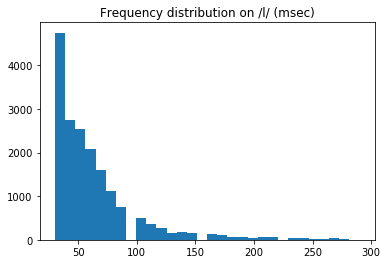

In [196]:
# Statistic data on /l/ duration
# Eliminated upper and lower 1% datapoints
print("Total count: " + str(len(ldur1_list)))
print("Minimum duration: " + str(round(min(ldur1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(ldur1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(ldur1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(ldur1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(ldur1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(ldur1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(ldur1_list)*0.0000625, 2)) + " sec")

# Histogram of /l/ duration
ldur1_msec = [ x*0.0625 for x in ldur1_list]
plt.hist(ldur1_msec, bins = 30)
plt.title("Frequency distribution on /l/ (msec)")
plt.show()

<strong>4.2 /r/</strong>

<i>Statistic data</i>

In [166]:
# List of durations of /r/
rdur_list = phon_dur_dict["r"][::2]
print("Total occurencies of /r/: " + str(len(rdur_list)))

Total occurencies of /r/: 12485


In [197]:
# List of durations of /r/
# Eliminated upper and lower 1% of data
rdur1_list = phon_dur_dict["r"][::2]
rdur1_list = sorted(rdur1_list)
out = int(len(rdur1_list)*1.0//100)
rdur1_list = rdur1_list[out:len(rdur1_list)-out]
print("Total occurencies of /r/: " + str(len(rdur1_list)))

Total occurencies of /r/: 12237


Total count: 12485
Minimum duration: 0.03 sec
Maximum duration: 0.68 sec
Q1: 0.03 sec
Mean duration: 0.05 sec
Median duration: 0.04 sec
Q3: 0.07 sec
Standard deviation: 0.03 sec


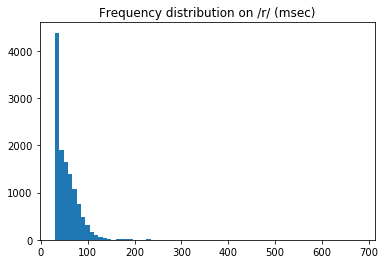

In [168]:
# Statistic data on /r/ duration
print("Total count: " + str(len(rdur_list)))
print("Minimum duration: " + str(round(min(rdur_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(rdur_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(rdur_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(rdur_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(rdur_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(rdur_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(rdur_list)*0.0000625, 2)) + " sec")

# Histogram of /r/ duration
rdur_msec = [ x*0.0625 for x in rdur_list]
plt.hist(rdur_msec, bins = 70)
plt.title("Frequency distribution on /r/ (msec)")
plt.show()

Total count: 12237
Minimum duration: 0.03 sec
Maximum duration: 0.15 sec
Q1: 0.03 sec
Mean duration: 0.05 sec
Median duration: 0.04 sec
Q3: 0.06 sec
Standard deviation: 0.02 sec


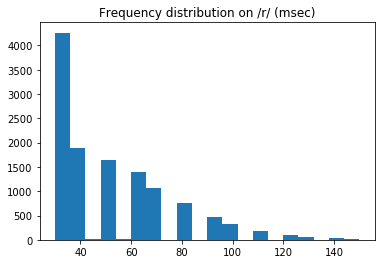

In [200]:
# Statistic data on /r/ duration
# Eliminate upper and lower 1% datapoints
print("Total count: " + str(len(rdur1_list)))
print("Minimum duration: " + str(round(min(rdur1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(rdur1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(rdur1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(rdur1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(rdur1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(rdur1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(rdur1_list)*0.0000625, 2)) + " sec")

# Histogram of /r/ duration
rdur1_msec = [ x*0.0625 for x in rdur1_list]
plt.hist(rdur1_msec, bins = 20)
plt.title("Frequency distribution on /r/ (msec)")
plt.show()

<strong>5. Approximant: /j/</strong>

<i>Statistic data</i>

In [169]:
# List of durations of /j/
jdur_list = phon_dur_dict["j"][::2]
print("Total occurencies of /j/: " + str(len(jdur_list)))

Total occurencies of /j/: 8051


In [201]:
# List of durations of /j/
# Eliminated upper and lower 1% of data
jdur1_list = phon_dur_dict["j"][::2]
jdur1_list = sorted(jdur1_list)
out = int(len(jdur1_list)*1.0//100)
jdur1_list = jdur1_list[out:len(jdur1_list)-out]
print("Total occurencies of /j/ (without upper & lower 1%): " + str(len(jdur1_list)))

Total occurencies of /j/ (without upper & lower 1%): 7891


Total count: 8051
Minimum duration: 0.03 sec
Maximum duration: 1.83 sec
Q1: 0.06 sec
Mean duration: 0.12 sec
Median duration: 0.09 sec
Q3: 0.14 sec
Standard deviation: 0.11 sec


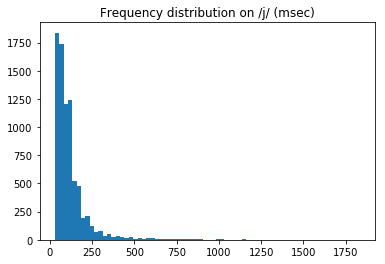

In [170]:
# Statistic data on /j/ duration
print("Total count: " + str(len(jdur_list)))
print("Minimum duration: " + str(round(min(jdur_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(jdur_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(jdur_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(jdur_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(jdur_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(jdur_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(jdur_list)*0.0000625, 2)) + " sec")

# Histogram of /j/ duration
jdur_msec = [ x*0.0625 for x in jdur_list]
plt.hist(jdur_msec, bins = 70)
plt.title("Frequency distribution on /j/ (msec)")
plt.show()

Total count: 7891
Minimum duration: 0.03 sec
Maximum duration: 0.62 sec
Q1: 0.06 sec
Mean duration: 0.11 sec
Median duration: 0.09 sec
Q3: 0.13 sec
Standard deviation: 0.08 sec


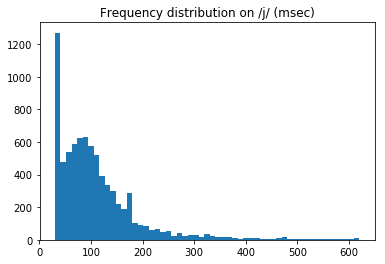

In [206]:
# Statistic data on /j/ duration
# Eliminated upper and lower 1% datapoints
print("Total count: " + str(len(jdur1_list)))
print("Minimum duration: " + str(round(min(jdur1_list)*0.0000625, 2)) + " sec")
print("Maximum duration: " + str(round(max(jdur1_list)*0.0000625, 2)) + " sec")
print("Q1: " + str(round(np.percentile(jdur1_list, 25)*0.0000625, 2)) + " sec")
print("Mean duration: " + str(round(np.mean(jdur1_list)*0.0000625, 2)) + " sec")
print("Median duration: " + str(round(np.median(jdur1_list)*0.0000625, 2)) + " sec")
print("Q3: " + str(round(np.percentile(jdur1_list, 75)*0.0000625, 2)) + " sec")
print("Standard deviation: " + str(round(np.std(jdur1_list)*0.0000625, 2)) + " sec")

# Histogram of /j/ duration
jdur1_msec = [ x*0.0625 for x in jdur1_list]
plt.hist(jdur1_msec, bins = 55)
plt.title("Frequency distribution on /j/ (msec)")
plt.show()

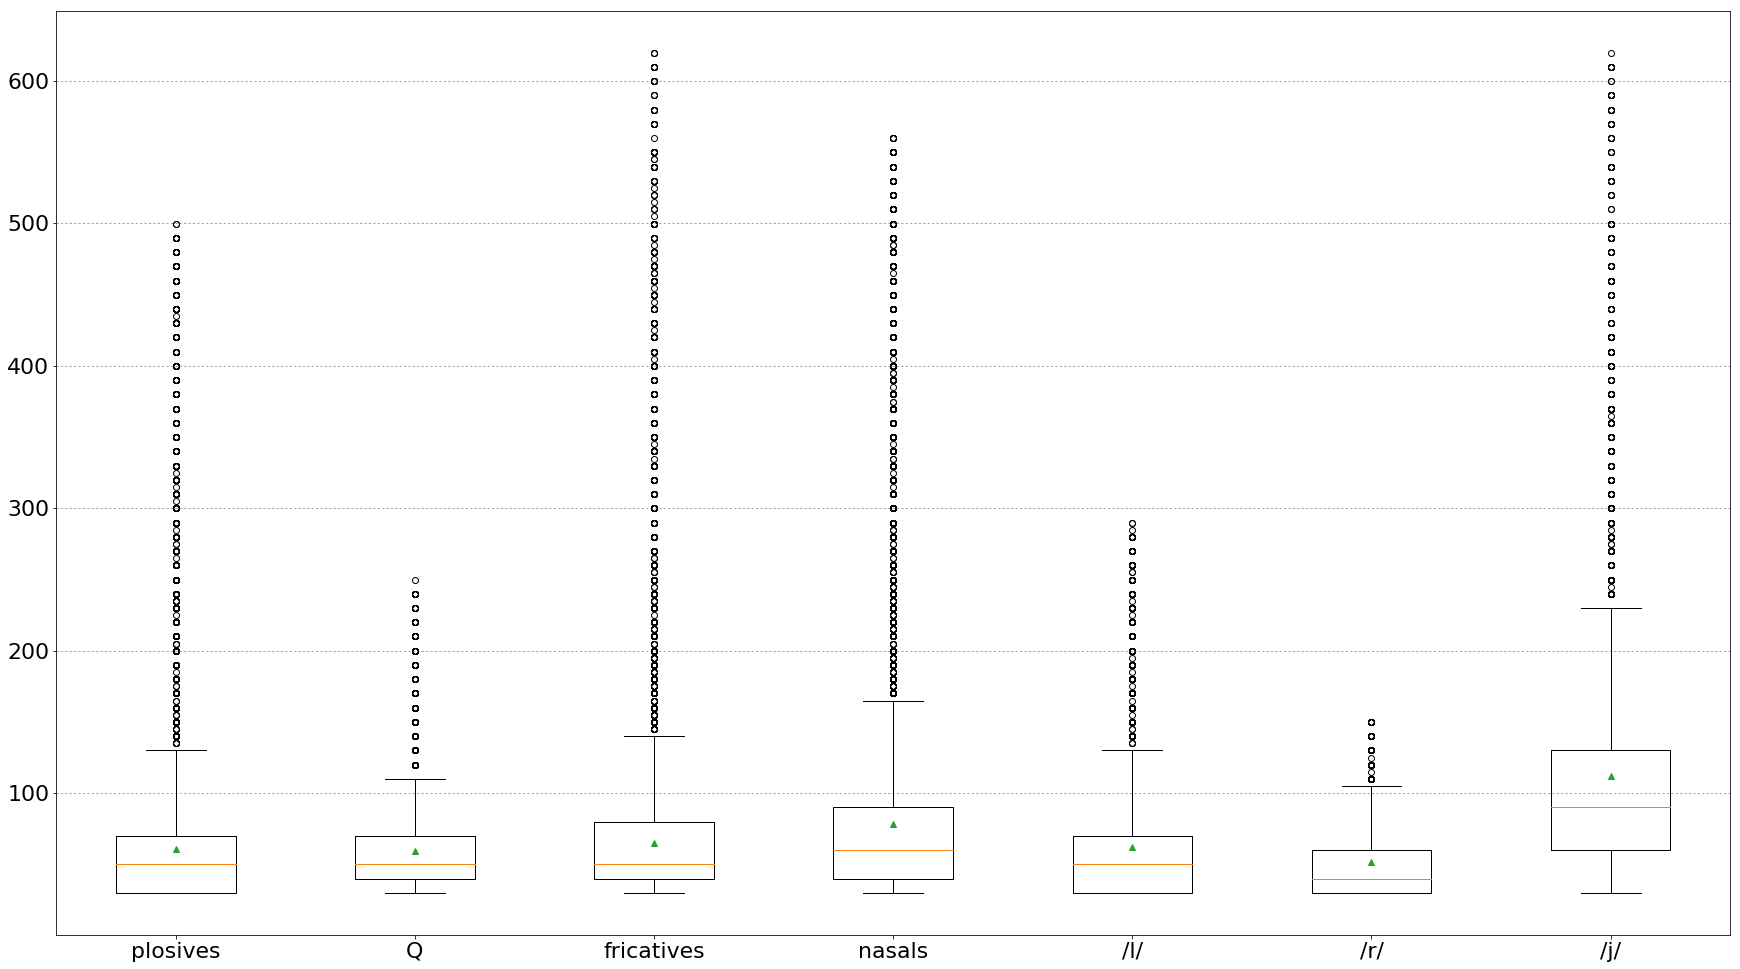

In [211]:
# Create a boxplot overview for the major consonant classes
# Eliminated upper and lower 1% of the datapoints
cons_list = []
q_clean = [ x*0.0625 for x in q_clean]
for el in [plos1_msec, clean1_ms, fric1_msec, nasal1_msec, ldur1_msec, rdur1_msec, jdur1_msec]:
    cons_list.append(el)

lab_list = ["plosives", "Q", "fricatives", "nasals", "/l/", "/r/", "/j/"]

plt.figure(figsize=(30, 17))
plt.grid(True, which='major', axis="y", color='gray', linestyle=':', linewidth=0.7)
plt.boxplot(cons_list, labels = lab_list, showmeans=True)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.savefig(fig_path+"/cmp_cons_classes.png", format="png")
plt.show()